In [50]:
import imageio
im = imageio.imread('/Users/x2021595/Downloads/yy.png')
im.shape  # im is a numpy array

im = im[:,:,1]
N = im.shape[0]

In [51]:
import numpy as np
import matplotlib.pyplot as plt

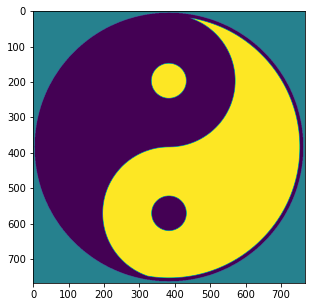

In [52]:
fig,ax = plt.subplots(figsize=(5,5))
plt.imshow(im)

In [53]:
XX,YY = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))


In [54]:
im[((XX)**2+(YY)**2)>0.9]=0

In [55]:
XX=XX.flatten()
YY=YY.flatten()

In [56]:
csum = np.cumsum(im.flatten())
mx = csum[-1]

In [119]:
nx=300

In [120]:
X = np.empty(shape=(nx,2))
for i in (range(nx)):
    j = np.random.randint(mx)
    k = np.searchsorted(csum,j)
    X[i]=-XX[k],-YY[k]

(-1.0, 1.0)

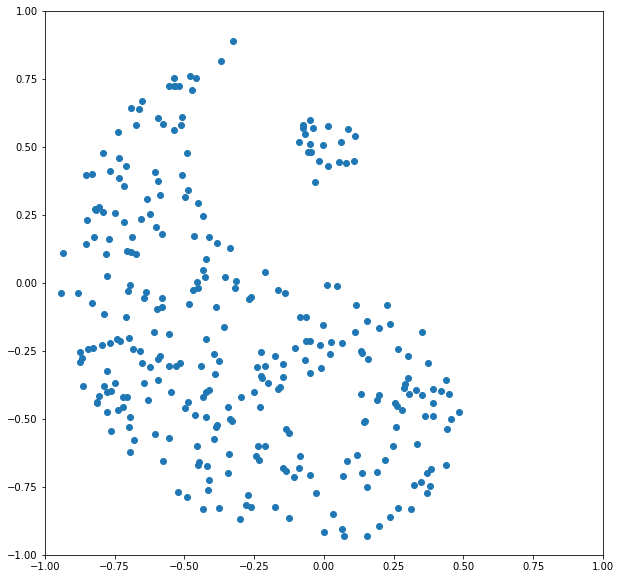

In [121]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(*X.T,'o')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)

In [122]:
from annchor import BruteForce

In [123]:
from annchor import BruteForce
bf = BruteForce(X,lambda x,y:np.linalg.norm(x-y))

In [124]:
bf.get_neighbor_graph()

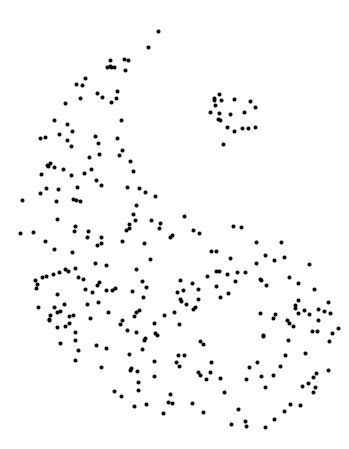

In [128]:

neighbor_graph =bf.neighbor_graph


from tqdm.notebook import tqdm as tq
fig,ax = plt.subplots(figsize=(3*2,4*2))
ax.plot(*X.T,'.',color='k',alpha=1,markersize=6)
ax.axis('off')
k=1
K=10
#for j in tq(range(k)):
#    U = X[np.arange(nx)]
#    V = X[neighbor_graph[0][:,j+1]]
#    for u,v in zip(U,V):
#        ax.plot(*np.vstack([u,v]).T,color=plt.cm.cool(1-j/(K-1)),zorder=-j,linewidth=2)
ax.set_xlim(-1,0.5)
ax.set_ylim(-1,1)

plt.savefig("/Users/x2021595/Downloads/y0nn.png")


plt.show()

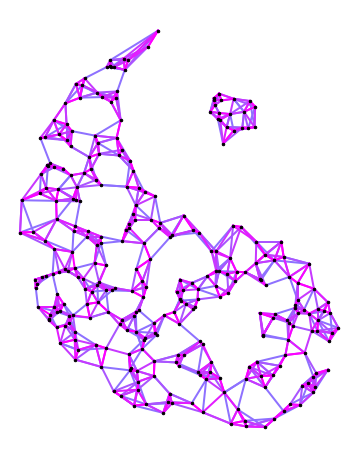

In [126]:

neighbor_graph =bf.neighbor_graph


from tqdm.notebook import tqdm as tq
fig,ax = plt.subplots(figsize=(3*2,4*2))
ax.plot(*X.T,'.',color='k',alpha=1,markersize=5)
ax.axis('off')
k=5
K=10
for j in tq(range(k)):
    U = X[np.arange(nx)]
    V = X[neighbor_graph[0][:,j+1]]
    for u,v in zip(U,V):
        ax.plot(*np.vstack([u,v]).T,color=plt.cm.cool(1-j/(K-1)),zorder=-j,linewidth=2)
ax.set_xlim(-1,0.5)
ax.set_ylim(-1,1)

plt.savefig("/Users/x2021595/Downloads/y5nn.png")


plt.show()

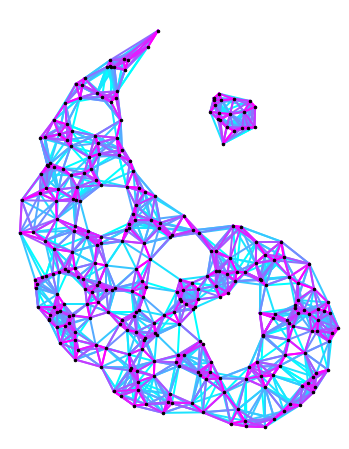

In [127]:

neighbor_graph =bf.neighbor_graph


from tqdm.notebook import tqdm as tq
fig,ax = plt.subplots(figsize=(3*2,4*2))
ax.plot(*X.T,'.',color='k',alpha=1,markersize=5)
ax.axis('off')
k=10
K=10
for j in tq(range(k)):
    U = X[np.arange(nx)]
    V = X[neighbor_graph[0][:,j+1]]
    for u,v in zip(U,V):
        ax.plot(*np.vstack([u,v]).T,color=plt.cm.cool(1-j/(K-1)),zorder=-j,linewidth=2)
ax.set_xlim(-1,0.5)
ax.set_ylim(-1,1)
plt.savefig("/Users/x2021595/Downloads/y10nn.png")



plt.show()

In [129]:
from annchor import Annchor

In [140]:
ann = Annchor(X,lambda x,y: np.linalg.norm(x-y))
ann.fit()

In [141]:
from annchor import compare_neighbor_graphs
compare_neighbor_graphs(neighbor_graph,ann.neighbor_graph,15)

0

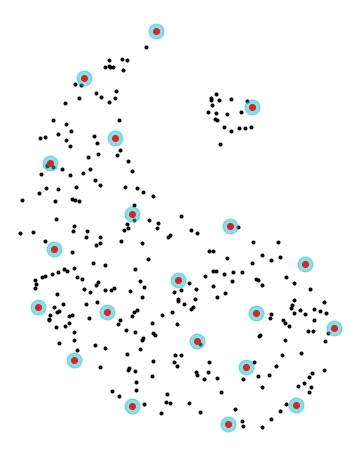

In [159]:

fig,ax = plt.subplots(figsize=(3*2,4*2))
ax.plot(*X.T,'.',color='k',alpha=1,markersize=6)
ax.plot(*X[ann.A].T,'o',color=plt.cm.tab10.colors[-1],alpha=0.5,markersize=15)


ax.plot(*X[ann.A].T,'o',color=plt.cm.tab10.colors[3],alpha=1,markersize=6)


ax.axis('off')

ax.set_xlim(-1,0.52)
ax.set_ylim(-1,1)

plt.savefig("/Users/x2021595/Downloads/y5nn.png")


plt.show()